# Model evaluation

This example shows how to load model and observation data and evalute model performance. 

In [ ]:
# skip this if package has already been installed
!pip install modvis

In [1]:
from modvis import ATSutils
from modvis import utils
from modvis import general_plots as gp

import matplotlib.pyplot as plt

model_dir = "../data/coalcreek"

Download the sample data when running on `Google Colab`

In [2]:
# import os
# if not os.path.exists(model_dir):
#   !git clone https://github.com/pinshuai/modvis.git
#   %cd ./modvis/examples/notebooks

## Load model data

This will load the `water_balance-daily.dat` file generated from ATS model. The data file includes watershed variables including outlet discharge, ET, and etc.

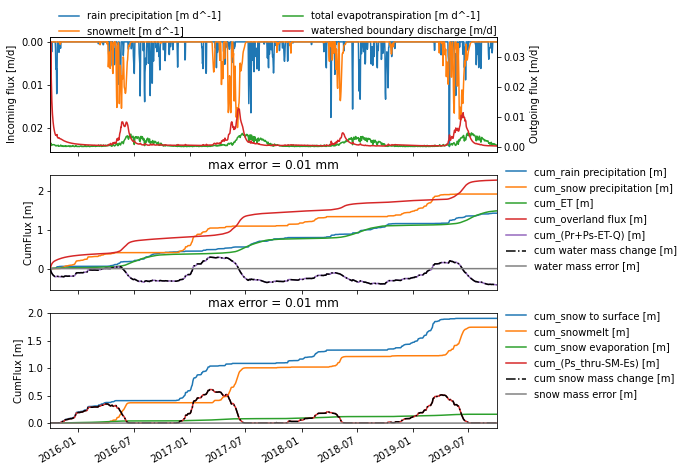

In [3]:
simu_df = ATSutils.load_waterBalance(model_dir, WB_filename="water_balance-daily.dat",
                                plot = True)

## Load observation data

In [4]:
obs_df = utils.load_nwis(sites= "09111250", start = '2014-10-01')

<AxesSubplot:>

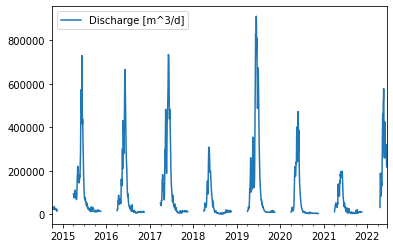

In [5]:
obs_df.plot()

## Streamflow comparison

Compare simulated streamflow with observed USGS streamflow.

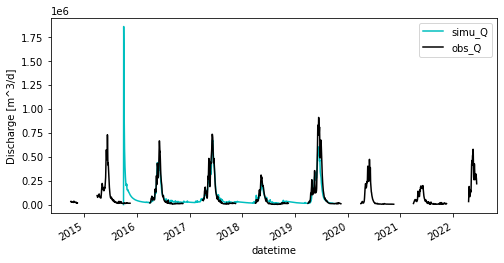

In [6]:
fig,ax = plt.subplots(1,1, figsize=(8,4))
simu_df['watershed boundary discharge [m^3/d]'].plot(color = 'c',ax=ax, label= "simu_Q")
obs_df['Discharge [m^3/d]'].plot(color = 'k', ax=ax, label = "obs_Q")
ax.set_ylabel("Discharge [m^3/d]")
ax.legend()

## FDC comparison

Compare the simulated vs. observed flow duration curve.

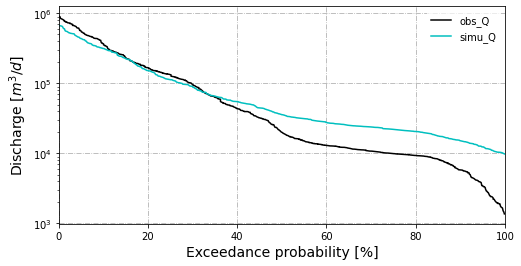

In [7]:
fig, ax = gp.plot_FDC(dfs=[obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]']],
           labels=['obs_Q','simu_Q'], 
           colors=['k', 'c'],
           start_date="2016-10-01" 
           )

## One-to-one plot

One to one scatter plot with metrics.

{'R^2': 0.8721059035985849,
 'NSE': 0.8386136492066862,
 'mKGE': 0.7947371500678737}

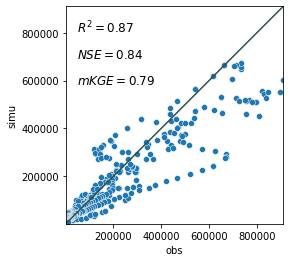

In [8]:
gp.one2one_plot(obs_df['Discharge [m^3/d]'], simu_df['watershed boundary discharge [m^3/d]'],
               metrics=['R^2', 'NSE', 'mKGE'],
                # metrics='all',
               show_density=False,
                start_date="2016-10-01"
               )